

# Richards' Equation

This is a simple verticle, pseudo-1D column of water with a water table below the surface.  It solves the pressure to steady-state.  For constant density and incompressible solid, this would be a linear pressure profile. (but we include a pressure-dependent density.)

The highlight of this problem is - 
#### Infiltration of water is taken into account: Neumann mass flux boundary - Top surface - -0.000176 $mol m^{-2} s^{-1}$
#### Initial hydrostatic head:   - 6.0 m i.e. 4 m from the bottom! 
#### Time period - 0 - 10 s
Input parameters:

1. Mesh size defined using Generated Mesh - Box type.
- Low coordinate - (0,0,0), High coordinate - (1,1,10), number of cells - (1,1,100)
- Creates a pseudo 1D water column with 100 cells along the z-direction.

2. Solves the Richards equation

3. Boundary condition - Neumann B.C: Mass flux on the top = -0.000176 $mol m^{-2} s^{-1}$

4. Water Retention Parameters [WRM] - Van Genuchten Model : $alpha$ [$Pa^{-1}$] = 0.00015, m [-] = 0.8, residual saturation [-] = 0.

5. Water content is calculated by Richards water content. 

\begin{equation}
            \theta = n * s * \phi *  {cell volume}
\end{equation}

where n = molar density of liquid phase [mol $m^{-3}$], s = saturation of phase [-], $\phi$ = porosity [-].

6. The relative permeability method - upwind with Darcy flux - Relative permeability is defined on cells, but must be calculated on faces to multiply a flux.

7. n = 0.25, K (Abs. permeability) = 2.5e-12 m^2, T_{initial} = 275.15 K,  g = (0,0,-9.8006m ms^{-2}), n_l = 55000 mol m^{-3}, dynamic_viscosity = 0.00089 Pas, Pore compressibility =  1e-09 Pa^{-1}.

8. Hydrostatic head [m] = -3.0 m, Hydrostatic water density = 1000 kg m^{-3}

9. Visualization - Entire domain, Times start period stop - (0, 1, 10) - (Start, period, stop). The time steps is 0.1, hence we will have a total of 10 results. 


### Richards equation:

For transient state, the 3-D Richard's equation in variably saturated domain is:
\begin{equation}
    \frac{\partial \theta}{\partial t} - \triangledown \frac{k_r n_l}{\mu} K (\triangledown p + \rho g \hat{z}) = Q_w 
\end{equation}

where, $\theta$ = Extensive water content of the cell [mol], t = time variable [s], $\triangledown$ = Divergence operator, $k_r$ = relative permeability [-], $n_l$ = molar density of liquid phase [mol $m^{-3}$], $\mu$ = Absolute (Dynamic) viscosity of water (Pas), K = Absolute permeability [$m^{2}$], p = liquid pressure [Pa], $\rho$ = density of water, $\hat{z}$ = elevation [m], $Q_w$ = mass source of water [mol $s^{-1}$] 

For steady state, $\frac{\partial \theta}{\partial t}$ = 0 and $Q_w$ = -0.0005 mol m^{-2} s^{-1}.

Hence the above equation reduces as:
\begin{equation}
    \triangledown \frac{k_r n_l}{\mu} K (\triangledown p + \rho g \hat{z}) = Q_w
\end{equation}

### Van-Genuchten Maulem  Model

#### Defined in the function - $wrm_{vangenuchten}$

The retention curve as given by [Schuh et al., 2017] :

If $P_c$ > 0, $S_*$ ($P_c$) = $S_r$ + (1 - $S_r$) $[1 + (\alpha P_c)^n]^{-m}$

else $S_*$ ($P_c$) = 1


Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

where, $S_*$ - Retention curve for unfrozen liquid-gas phase, $S_r$ (-) - Residual saturation, $P_c$ (Pa) - Capillary pressure, and $\alpha$ ($Pa^{-1}$), and m = 1 - 1/n - model parameters, $s_l$ = saturation of liquid

The saturation of liquid and gas is equal to 1, i.e,

$s_l + s_g = 1$






The exponent m controls the shape of the soil retention curve and can be related to the pore size distribution of the texture, where larger values corresponds to smaller pore size variability i.e. to well-sorted textures.

Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}


$s_l = S_* [-\beta \rho_i h_0 \upsilon H (-\upsilon) + (S_*)^{-1} (s_l + s_i)]$
 - However this equation includes the ice phase! - What is the equation used by the demo problem?

Author: Ethan Coon (Initial code) and Radhakrishna

In [1]:
%matplotlib inline

In [2]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import xml.etree.ElementTree as ET

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
file_name = 'infiltration_prep_trans.demo'
input_filename = 'infiltration_prep_trans.xml'

In [5]:
# load the ATS solution
directory = f"./{file_name}/"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)


 - Lighter color signifies earlier time steps. 

VGC parameters: alpha = 0.00015, m = 0.8, w_res = 0

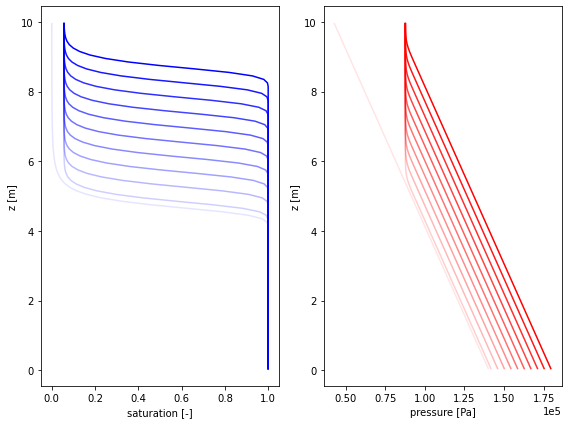

In [6]:
# plot the solution
fig = plt.figure(figsize=(8,6))
axs = fig.subplots(1,2)
plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[0], None, 'b')
plot_column_data.plot_subsurface(vis, ['pressure',], axs[1], None, 'r')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z [m]')
plt.tight_layout()
plt.show()

In [7]:
def plot(dirname, title):
    """A generic plotting function that plots saturation as a function of depth."""
    fig = plt.figure()

    vis = ats_xdmf.VisFile(dirname, time_unit='d')
    vis.loadMesh(columnar=True)
    
    # plot the solution
    ax = fig.subplots(1,1)
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], ax, None, cmap='jet')

    ax.set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

Plot by Author - Ethan coon - The first example simply looks at infiltrating into a column, slowly filling up the subsurface.  Note that the color scheme goes from the initial condition in blue to later times in red.

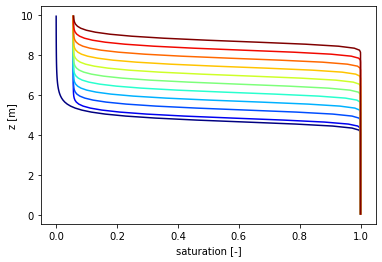

In [8]:
plot(f"{file_name}/", "infiltration to seepage face")

### RK - work

In [9]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = hdf.get('base_porosity.cell.0')
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


<HDF5 group "/base_porosity.cell.0" (11 members)>


In [10]:
def inputfiles_pddataframes(file_name,t):
    """
    The function is defined to read the input files from the ats simulation. 
    For each time instance, a dataframe can store the data.
 
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    t : The time instance at which the data is required.
    Ex: cell_volume.cell.0/{t} - here 0/0 - signifies the first directory (with data at t=0), 
    similary 0/1 - signifies the second directory (with data at t=1).
            
    Output parameters:
    
    data_results : pandas dataframe with all the key elements of the simulation.
    
    """
    
    with h5py.File(file_name,'r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
        cell_volume = cell_volume_all.flatten()

        # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
        # Can we simplify the code?
        z = np.arange(0.0,10.0,0.1)
        data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

        mass_density_all = np.array(hdf.get(f'mass_density_liquid.cell.0/{t}'))
        mass_density = mass_density_all.flatten()
        data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density



        molar_density_all = np.array(hdf.get(f'molar_density_liquid.cell.0/{t}'))
        molar_density = molar_density_all.flatten()
        data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density


        permeability_all = np.array(hdf.get(f'permeability.cell.0/{t}'))
        permeability = permeability_all.flatten()
        data_results['Absolute permeability [K] (m^{2})'] = permeability



        porosity_all = np.array(hdf.get(f'porosity.cell.0/{t}'))
        porosity = porosity_all.flatten()
        data_results['Porosity [phi] (-)'] = porosity

        pressure_all = np.array(hdf.get(f'pressure.cell.0/{t}'))
        pressure = pressure_all.flatten()
        data_results['Abs pressure [p_abs] [Pa]'] = pressure 
        # Water pressure or total pressure (Atm + water)? - Probably both

        relative_permeability_all = np.array(hdf.get(f'relative_permeability.cell.0/{t}'))
        relative_permeability = relative_permeability_all.flatten()
        data_results['Relative permeability [kr] [-]'] = relative_permeability


        saturation_gas_all = np.array(hdf.get(f'saturation_gas.cell.0/{t}'))
        saturation_gas = saturation_gas_all.flatten()
        data_results['Saturation of gas [s_g] [-]'] = saturation_gas


        saturation_liquid_all = np.array(hdf.get(f'saturation_liquid.cell.0/{t}'))
        saturation_liquid = saturation_liquid_all.flatten()
        data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid


        #temperature_all = np.array(hdf.get(f'temperature.cell.0/{t}'))
        #temperature = temperature_all.flatten()
        #data_results['Temperature [T] [K]'] = temperature


        viscosity_liquid_all = np.array(hdf.get(f'viscosity_liquid.cell.0/{t}'))
        viscosity_liquid = viscosity_liquid_all.flatten()
        data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid


        water_content_all = np.array(hdf.get(f'water_content.cell.0/{t}'))
        water_content = water_content_all.flatten()
        data_results['water_content [theta] mols'] = water_content
        
        return data_results

In [11]:
# Determining the time instances at which the data is stored

with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        print(time_period)
        # Time series stored in an irregular format! - 
        # ['0' '100' '103' '104' '105' '106' '107' '108' '109' '110' '111']

[  0 100 101 102 103 104  94  96  97  98  99]


### Storing the data for all time instances

In [12]:
for i in time_period:
    # https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops
    locals()["data_results_"+str(i)] = inputfiles_pddataframes(file_name=f'{file_name}/ats_vis_data.h5', t=i)

### Plotting the initial pressure:

In [13]:
data_results_0['Abs pressure [p_abs] [Pa]']

0.0    140061.2675
0.1    139080.6025
0.2    138099.9375
0.3    137119.2725
0.4    136138.6075
          ...     
9.5     46898.0925
9.6     45917.4275
9.7     44936.7625
9.8     43956.0975
9.9     42975.4325
Name: Abs pressure [p_abs] [Pa], Length: 100, dtype: float64

In [14]:
rho_avg = 1000 # kg m^{-3} - Provided by the developer 
g = 9.8006 # ms^{-2} - Provided by the user, g = (0,0,-9.8006m ms^{-2})
p_0 = 101325 # Pa

# Calculating the water pressure = p_abs -p_0
data_results_0['Water pressure [p_l] [Pa]'] = data_results_0['Abs pressure [p_abs] [Pa]'] - p_0

data_results_0['Pressure head [m]'] = data_results_0['Water pressure [p_l] [Pa]']/(rho_avg*g)

data_results_0['Elevation head [m]'] = data_results_0.index

data_results_0['Hydraulic head [m]'] = data_results_0['Pressure head [m]'] + data_results_0['Elevation head [m]']

data_results_0['Atmospheric pressure head [m]'] = 101325/(rho_avg*g)

data_results_0

,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],viscosity_liquid [v] Pas],water_content [theta] mols,Water pressure [p_l] [Pa],Pressure head [m],Elevation head [m],Hydraulic head [m],Atmospheric pressure head [m]
0.0,0.1,1000.0,55000.0,2.500000e-12,0.250038,140061.2675,6.179775e+00,0.000000,1.000000,0.00089,1375.210299,38736.2675,3.952438,0.0,3.952438,10.338653
0.1,0.1,1000.0,55000.0,2.500000e-12,0.250037,139080.6025,6.179775e+00,0.000000,1.000000,0.00089,1375.204906,37755.6025,3.852377,0.1,3.952377,10.338653
0.2,0.1,1000.0,55000.0,2.500000e-12,0.250036,138099.9375,6.179775e+00,0.000000,1.000000,0.00089,1375.199512,36774.9375,3.752315,0.2,3.952315,10.338653
0.3,0.1,1000.0,55000.0,2.500000e-12,0.250035,137119.2725,6.179775e+00,0.000000,1.000000,0.00089,1375.194118,35794.2725,3.652253,0.3,3.952253,10.338653
0.4,0.1,1000.0,55000.0,2.500000e-12,0.250034,136138.6075,6.179775e+00,0.000000,1.000000,0.00089,1375.188725,34813.6075,3.552191,0.4,3.952191,10.338653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,1000.0,55000.0,2.500000e-12,0.250000,46898.0925,4.510943e-11,0.999775,0.000225,0.00089,0.309509,-54426.9075,-5.553426,9.5,3.946574,10.338653
9.6,0.1,1000.0,55000.0,2.500000e-12,0.250000,45917.4275,3.640860e-11,0.999790,0.000210,0.00089,0.288172,-55407.5725,-5.653488,9.6,3.946512,10.338653
9.7,0.1,1000.0,55000.0,2.500000e-12,0.250000,44936.7625,2.949669e-11,0.999805,0.000195,0.00089,0.268643,-56388.2375,-5.753550,9.7,3.946450,10.338653
9.8,0.1,1000.0,55000.0,2.500000e-12,0.250000,43956.0975,2.398384e-11,0.999818,0.000182,0.00089,0.250740,-57368.9025,-5.853611,9.8,3.946389,10.338653


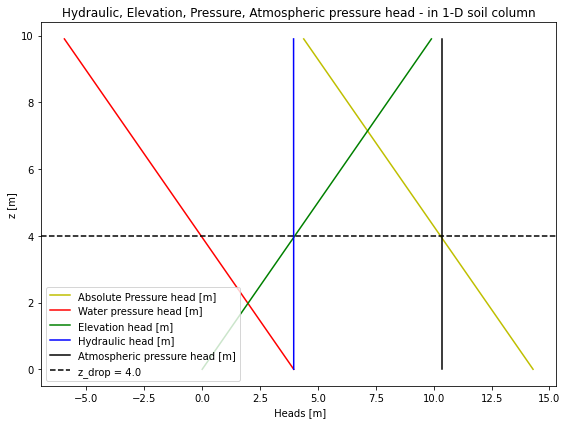

In [15]:
# To find the elevation where -ve pressure head begins
z_drop = data_results_0[data_results_0['Pressure head [m]'].le(0)].index[0]

z = np.arange(0,10,0.1)

fig = plt.figure(figsize=(8,6))

plt.title('Hydraulic, Elevation, Pressure, Atmospheric pressure head - in 1-D soil column')
plt.plot(data_results_0['Abs pressure [p_abs] [Pa]']/(rho_avg*g), z, 'y', label='Absolute Pressure head [m]')
plt.plot(data_results_0['Pressure head [m]'], z, 'r', label='Water pressure head [m]')
plt.plot(data_results_0['Elevation head [m]'], z, 'g', label='Elevation head [m]')
plt.plot(data_results_0['Hydraulic head [m]'], z, 'b', label='Hydraulic head [m]')
plt.plot(data_results_0['Atmospheric pressure head [m]'], z, 'k', label='Atmospheric pressure head [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label=f'z_drop = {z_drop}')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

### Plotting relative permeability

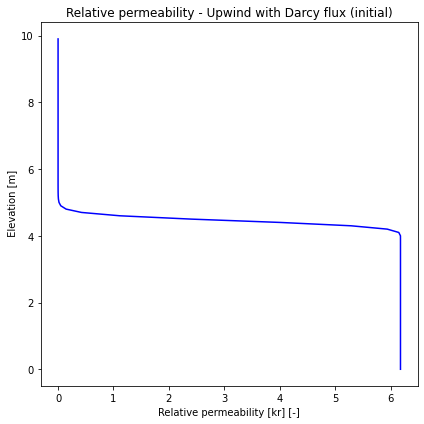

In [16]:
fig = plt.figure(figsize=(6,6))

plt.title('Relative permeability - Upwind with Darcy flux (initial)')
plt.plot(data_results_0['Relative permeability [kr] [-]'],z, 'b')

plt.xlabel('Relative permeability [kr] [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
#plt.show()

#### Calculating the saturation based on VanGenuchten's model


In [17]:
# data_results_VGC = pd.DataFrame(data=data_results['Water pressure [p] [Pa]'].values,index=

In [18]:
#data_results_VGC['ad'] = data_results['Water pressure [p] [Pa]']*10

In [19]:
##### Parameters that we assigned:
#alpha = 0.00015
#m = 0.8
#Sr = 0
#n = 1/(1-m)
#data_results_VGC = data_results.copy()
#data_results_VGC['S_*'] = Sr + (1 - Sr) * pow(1 + pow(alpha*data_results_VGC['Water pressure [p] [Pa]'],n),(-m))
#data_results_VGC['S_*(Pc)'] =  pow(1 + pow(alpha * data_results['Water pressure [p] [Pa]'],n),(-m))


How do you find out saturation of the liquid?

### Plotting initial saturation :

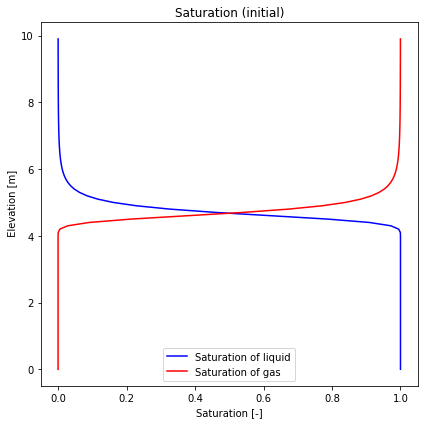

In [20]:
fig = plt.figure(figsize=(6,6))

plt.title('Saturation (initial)')
plt.plot(data_results_0['Saturation of liquid [s_l] [-]'], z, 'b', label='Saturation of liquid')
plt.plot(data_results_0['Saturation of gas [s_g] [-]'], z, 'r', label='Saturation of gas')

plt.xlabel('Saturation [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
plt.legend()
#plt.show()

In [21]:
### Plotting Richards water content

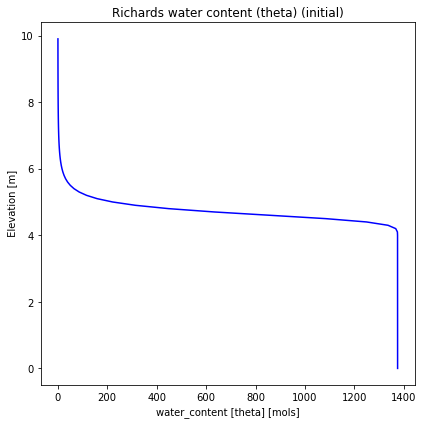

In [22]:
fig = plt.figure(figsize=(6,6))

plt.title('Richards water content (theta) (initial)')
plt.plot(data_results_0['water_content [theta] mols'],z, 'b')

plt.xlabel('water_content [theta] [mols]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
#plt.show()

### Plotting the saturation results

In [23]:
print(time_period.sort)

<built-in method sort of numpy.ndarray object at 0x7fd670ce5f90>


In [24]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
        print(time_period)

[  0  94  96  97  98  99 100 101 102 103 104]


In [25]:
file_name

'infiltration_prep_trans.demo'

In [28]:
time_period[1:]

array([ 94,  96,  97,  98,  99, 100, 101, 102, 103, 104])

### Defining a dataframe that extracts the data for a single variable for all time instances

In [30]:
def input_datavar(file_name, variable):
    """
    The function defined to extract a variable across all time instances.
    
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    variable: Name of the variable in the dataset that you are interested in.
    Ex: 'cell_volume'
    
    Output parameters:
    
    data_var : pandas dataframe with the time series data of the variable.
    
    """
    # To determine the time period and the list in which the dataframes 
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        z = np.arange(0.0, 10, 0.1)
        var_all_0 = np.array(hdf.get(f'{variable}.cell.0/0'))
        var_0 = var_all_0.flatten()
        data_var = pd.DataFrame(index=z,data=var_0,columns=[f'0'])
        
        for i in time_period[1:]:
            var_all = np.array(hdf.get(f'{variable}.cell.0/{i}'))
            var = var_all.flatten()
            
            data_var[f'{i}'] = var
    
    return data_var

In [31]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = hdf.get('base_porosity.cell.0')
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


<HDF5 group "/base_porosity.cell.0" (11 members)>


In [32]:
### Accessing the variable at all time instances

file_name = 'infiltration_prep_trans.demo'
variable = 'saturation_liquid'
saturation_data = input_datavar(file_name,variable)

saturation_data.columns = np.arange(0,11,1)
saturation_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
### Accessing the variable at all time instances

file_name = 'infiltration_prep_trans.demo'
variable = 'pressure'
pressure_data = input_datavar(file_name,variable)

pressure_data.columns = np.arange(0,11,1)
pressure_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0.0,140061.2675,141755.331203,145948.106372,150142.141028,154336.910964,158531.608734,162726.231279,166920.779006,171115.256135,175309.705259,179504.738827
0.1,139080.6025,140774.666203,144967.441373,149161.476029,153356.245965,157550.943735,161745.566280,165940.114007,170134.591135,174329.040259,178524.073827
0.2,138099.9375,139794.001204,143986.776374,148180.811030,152375.580966,156570.278735,160764.901281,164959.449008,169153.926136,173348.375260,177543.408828
0.3,137119.2725,138813.336206,143006.111375,147200.146031,151394.915967,155589.613737,159784.236282,163978.784009,168173.261138,172367.710262,176562.743829
0.4,136138.6075,137832.671207,142025.446377,146219.481033,150414.250969,154608.948739,158803.571284,162998.119011,167192.596140,171387.045264,175582.078831


In [34]:
pressure_head_data = pressure_data/(10000)

In [35]:
pressure_head_data

,0,1,2,3,4,5,6,7,8,9,10
0.0,14.006127,14.175533,14.594811,15.014214,15.433691,15.853161,16.272623,16.692078,17.111526,17.530971,17.950474
0.1,13.908060,14.077467,14.496744,14.916148,15.335625,15.755094,16.174557,16.594011,17.013459,17.432904,17.852407
0.2,13.809994,13.979400,14.398678,14.818081,15.237558,15.657028,16.076490,16.495945,16.915393,17.334838,17.754341
0.3,13.711927,13.881334,14.300611,14.720015,15.139492,15.558961,15.978424,16.397878,16.817326,17.236771,17.656274
0.4,13.613861,13.783267,14.202545,14.621948,15.041425,15.460895,15.880357,16.299812,16.719260,17.138705,17.558208
...,...,...,...,...,...,...,...,...,...,...,...
9.5,4.689809,8.772805,8.772805,8.772805,8.772805,8.772805,8.772806,8.772822,8.773046,8.776145,8.815432
9.6,4.591743,8.772805,8.772805,8.772805,8.772805,8.772805,8.772806,8.772814,8.772935,8.774615,8.796839
9.7,4.493676,8.772805,8.772805,8.772805,8.772805,8.772805,8.772805,8.772810,8.772875,8.773785,8.786109
9.8,4.395610,8.772805,8.772805,8.772805,8.772805,8.772805,8.772805,8.772808,8.772843,8.773335,8.780095


In [37]:
### Accessing the variable at all time instances

file_name = 'infiltration_prep_trans.demo'
variable = 'relative_permeability'
relative_permeability = input_datavar(file_name,variable)

relative_permeability.columns = np.arange(0,11,1)
relative_permeability.head()

,0,1,2,3,4,5,6,7,8,9,10
0.0,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775
0.1,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775
0.2,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775
0.3,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775
0.4,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775


In [42]:
plt.plot(relative_permeability[0], z, ha=0.1, label ='t = 0 s')
plt.plot(relative_permeability[2], z, =0.2, label ='t = 2 s')
plt.plot(relative_permeability[4], alpha=0.4, label ='t = 4 s')
plt.plot(relative_permeability[6], alpha=0.6, label ='t = 6 s')
plt.plot(relative_permeability[8], alpha=0.8, label ='t = 8 s')
#plt.plot(10], relative_permeability[10], alpha=1, label ='t = 10 s')
plt.legend()
#plt.set_ylabel('Relative permeability (-)')
#plt.set_xlabel('Saturation (-)')

,0,1,2,3,4,5,6,7,8,9,10
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.789288e+00,2.896425,3.160618,3.424886,3.689194,3.953497,4.217795,4.482089,4.746378,5.010665,5.274989
std,3.035466e+00,3.043871,3.049270,3.031487,2.990095,2.924090,2.831752,2.710394,2.555886,2.361730,2.117006
min,1.956984e-11,0.000718,0.000718,0.000718,0.000718,0.000718,0.000718,0.000718,0.000718,0.000720,0.000743
25%,1.255987e-08,0.000718,0.000718,0.000719,0.000732,0.000937,0.006832,0.526500,5.572942,6.179775,6.179775
50%,3.286173e-02,0.213344,4.655432,6.179768,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775
75%,6.179775e+00,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775
max,6.179775e+00,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775,6.179775


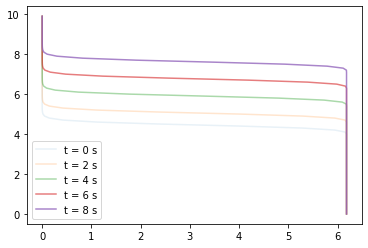

In [43]:
plt.plot(relative_permeability[0], z, alpha=0.1, label ='t = 0 s')
plt.plot(relative_permeability[2], z, alpha=0.2, label ='t = 2 s')
plt.plot(relative_permeability[4], z, alpha=0.4, label ='t = 4 s')
plt.plot(relative_permeability[6], z, alpha=0.6, label ='t = 6 s')
plt.plot(relative_permeability[8], z, alpha=0.8, label ='t = 8 s')
#plt.plot(10], relative_permeability[10], alpha=1, label ='t = 10 s')
plt.legend()
#plt.set_ylabel('Relative permeability (-)')
#plt.set_xlabel('Saturation (-)')

Text(0.5, 0, 'Saturation (-)')

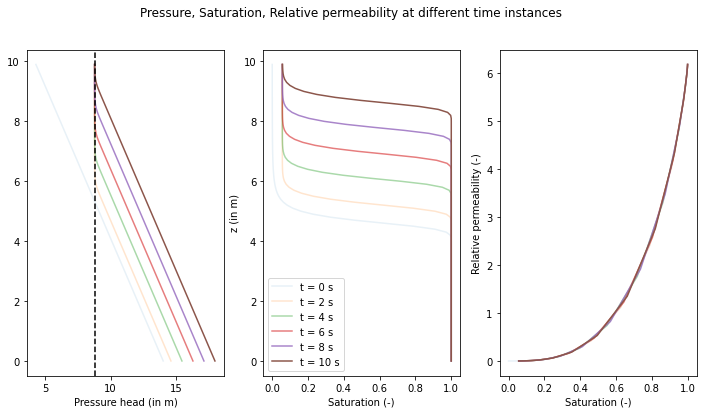

In [46]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=12,h=6)
fig.suptitle('Pressure, Saturation, Relative permeability at different time instances')

z = saturation_data.index

ax1.plot(saturation_data[0], z, alpha=0.1, label ='t = 0 s')
ax1.plot(saturation_data[2], z, alpha=0.2, label ='t = 2 s')
ax1.plot(saturation_data[4], z, alpha=0.4, label ='t = 4 s')
ax1.plot(saturation_data[6], z, alpha=0.6, label ='t = 6 s')
ax1.plot(saturation_data[8], z, alpha=0.8, label ='t = 8 s')
ax1.plot(saturation_data[10], z, alpha=1, label ='t = 10 s')
ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation (-)')

ax2.plot(pressure_head_data[0], z, alpha=0.1, label ='t = 0 s')
ax2.plot(pressure_head_data[2], z, alpha=0.2, label ='t = 2 s')
ax2.plot(pressure_head_data[4], z, alpha=0.4, label ='t = 4 s')
ax2.plot(pressure_head_data[6], z, alpha=0.6, label ='t = 6 s')
ax2.plot(pressure_head_data[8], z, alpha=0.8, label ='t = 8 s')
ax2.plot(pressure_head_data[10], z, alpha=1, label ='t = 10 s')
ax2.set_xlabel('Pressure head (in m)')
ax2.axvline(x=8.772805,color='k',linestyle='--',label='p-const = 8.77 m')
#ax2.legend()

ax3.plot(saturation_data[0], relative_permeability[0], alpha=0.1, label ='t = 0 s')
ax3.plot(saturation_data[2], relative_permeability[2], alpha=0.2, label ='t = 2 s')
ax3.plot(saturation_data[4], relative_permeability[4], alpha=0.4, label ='t = 4 s')
ax3.plot(saturation_data[6], relative_permeability[6], alpha=0.6, label ='t = 6 s')
ax3.plot(saturation_data[8], relative_permeability[8], alpha=0.8, label ='t = 8 s')
ax3.plot(saturation_data[10], relative_permeability[10], alpha=1, label ='t = 10 s')
#ax3.legend()
ax3.set_ylabel('Relative permeability (-)')
ax3.set_xlabel('Saturation (-)')


In [47]:
pressure_data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,91518.350000,102908.950145,105330.182305,107930.979712,110711.416404,113671.230298,116810.410378,120128.947164,123626.832800,127304.070672,131160.867510
std,28450.554779,17987.152543,19540.733450,21031.293949,22442.025850,23755.122398,24951.977802,26012.260355,26913.336943,27629.531946,28131.578673
min,42975.432500,87728.005657,87728.048821,87728.048821,87728.048826,87728.048897,87728.049882,87728.063617,87728.255085,87730.922546,87767.801871
25%,67246.891250,87728.048798,87728.166114,87729.730372,87751.381705,88032.676562,90094.831136,94108.297183,98300.915719,102495.330443,106690.363900
50%,91518.350000,93216.552331,97405.227286,101599.224767,105793.994056,109988.691826,114183.314371,118377.862098,122572.339227,126766.788351,130961.821919
75%,115789.808750,117483.872603,121676.647773,125870.682429,130065.452365,134260.150135,138454.772680,142649.320407,146843.797536,151038.246660,155233.280227
max,140061.267500,141755.331203,145948.106372,150142.141028,154336.910964,158531.608734,162726.231279,166920.779006,171115.256135,175309.705259,179504.738827
